<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D5_LC3_Interpretable_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Interpretable Machine Learning (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>

# Interpretable Machine Learning (Live coding)

## Load Dependencies

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# supress unnecessary warning msgs.
import warnings
warnings.filterwarnings('ignore')

## Data generation

In [ ]:
# boston.csv
gdrive_data_url = "https://drive.google.com/file/d/1cnIxAAqXnG9vHO59EuRBbnit_3rM_UOT/view?usp=share_link"
file_id = gdrive_data_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(data_file)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns = df.columns.str.upper()
df.rename(columns={'BLACK':'B', 'MEDV':'Price'}, inplace=True)

In [ ]:
X = df.drop(columns=['Price'])
y = df[['Price']]

X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [ ]:
y.head()

Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Interpreting Regression Models

We will look at how to interpret a variety of regression models here:

- Linear Regression
- KNN Regression
- XGBoost Regression

## Interpreting Linear Regression Model

### Train and Evaluate Model Performance

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print(r2_score(y_test, pred_lr))
print(mean_squared_error(y_test, pred_lr))

0.6687594935356326
24.291119474973478


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(lr.predict, data=X_train)

#### Explaining for a specific house (1 row of test data)

In [ ]:
X_test.iloc[7:8]

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
140  0.2909  0.0  21.89     0  0.624  6.174  93.6  1.6119    4  437     21.2   

          B  LSTAT  
140  388.08  24.16

In [ ]:
lr.predict(X_test.iloc[7:8])

array([[14.34119]])

In [ ]:
sv = explainer.shap_values(X_test.iloc[7:8])
pd.DataFrame(np.round(sv[0],3), columns=X_test.columns)

  0%|          | 0/1 [00:00<?, ?it/s]

CRIM     ZN  INDUS  CHAS    NOX    RM    AGE   DIS    RAD    TAX  PTRATIO  \
0  0.375 -0.348   0.44  -0.2 -1.161 -0.63 -0.158  3.18 -1.406 -0.351   -2.638   

       B  LSTAT  
0  0.393 -5.952

In [ ]:
# for interactive plots, use the 2nd one below if it doesn't render on colab
shap.initjs()
shap.force_plot(explainer.expected_value, sv[0], X_test.iloc[7:8])

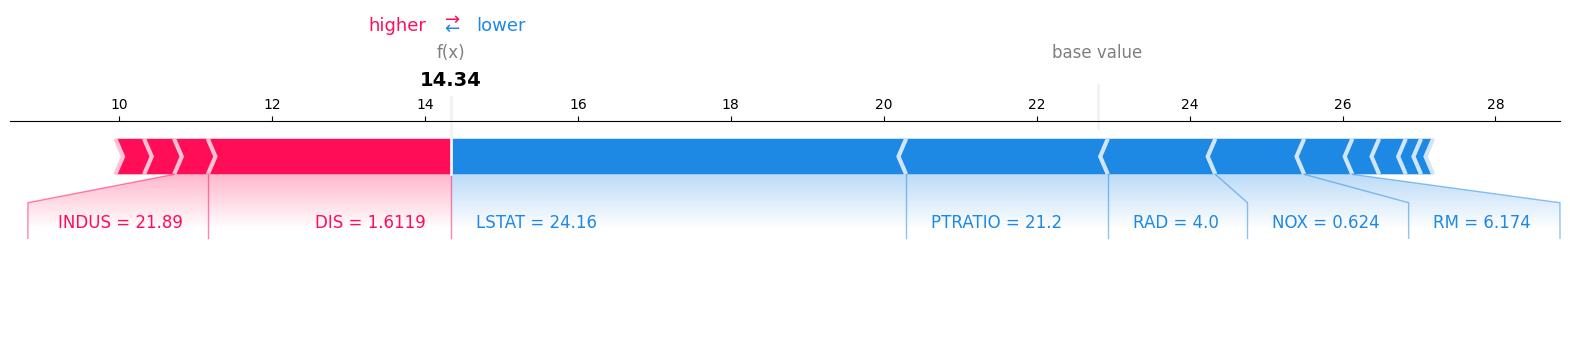

In [ ]:
#shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, sv[0], X_test.iloc[7:8], matplotlib=True)

#### Explaining for all rows of test data

Computed 1 row at a time

In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/102 [00:00<?, ?it/s]

In [ ]:
X_test.iloc[:3]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
173  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296   
274  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254   
491  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711   

     PTRATIO       B  LSTAT  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     20.1  390.11  18.07

In [ ]:
pd.DataFrame(np.round(shap_values[0],3), columns=X_test.columns)

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0  0.398 -0.348 -0.280 -0.200  0.800  0.444 -0.098  1.682 -1.143  1.150   
1  0.402  0.856 -0.185  2.585  1.883  1.962  0.225 -0.390 -1.406  1.597   
2  0.396 -0.348  0.677 -0.200 -0.903 -1.478 -0.190  2.809 -1.406 -3.268   

   PTRATIO      B  LSTAT  
0    1.573  0.484  1.738  
1    0.658  0.502  4.540  
2   -1.631  0.418 -2.854

In [ ]:
pred_lr[:3]

array([[28.99672362],
       [36.02556534],
       [14.81694405]])

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
shap_values = shap_values[0]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.397657 -0.348357 -0.280042  ...  1.573044  0.484440  1.737967
1  0.401652  0.856061 -0.184744  ...  0.657588  0.501732  4.540196
2  0.396078 -0.348357  0.676577  ... -1.631053  0.417866 -2.854433

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

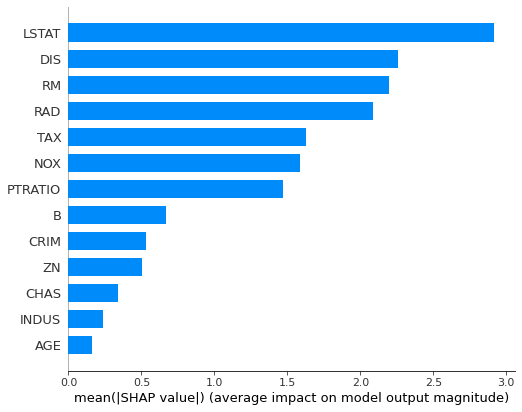

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

array([22.79653465])

In [ ]:
y_test.iloc[10].values, pred_lr[10]

(array([21.5]), array([24.90850512]))

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_lr[1]

(array([32.4]), array([36.02556534]))

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

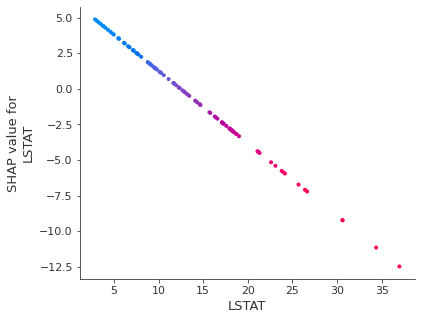

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

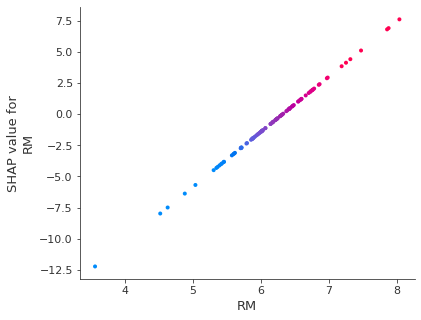

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

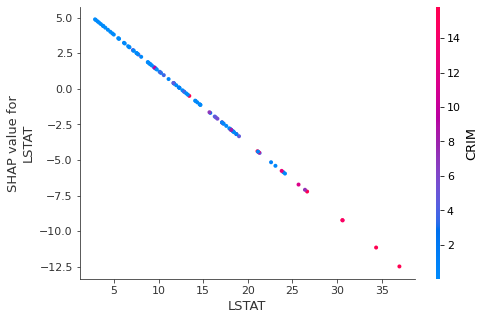

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

## Interpreting KNN Regression Model

### Train and Evaluate Model Performance

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
print(r2_score(y_test, pred_knn))
print(mean_squared_error(y_test, pred_knn))

0.7046442656646525
21.65955337690632


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(knn.predict, data=shap.kmeans(X_train,100))
shap_values = explainer.shap_values(X_test)

  0%|          | 0/102 [00:00<?, ?it/s]

In [ ]:
shap_values = shap_values[0]

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.213706 -0.268425  0.752951  ...  0.220831  0.395711  1.512299
1  0.091771  2.644115  0.257055  ...  0.041309  0.900682  1.590178
2  0.167828 -0.613662 -0.242536  ...  0.017056  0.116261 -3.201249

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

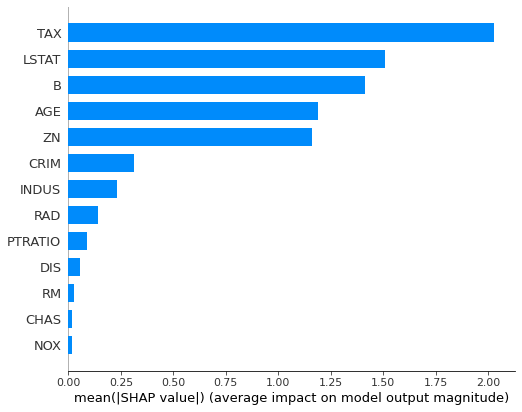

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

array([22.49405941])

In [ ]:
y_test.iloc[10].values, pred_knn[10]

(array([21.5]), array([23.66666667]))

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_knn[1]

(array([32.4]), array([32.76666667]))

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

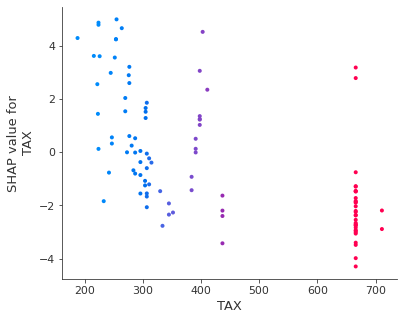

In [ ]:
shap.dependence_plot(ind='TAX', interaction_index='TAX',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

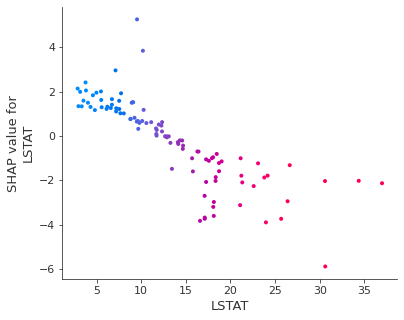

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

## Interpreting XGBoost Regression Model

### Train and Evaluate Model Performance

In [ ]:
from xgboost import XGBRegressor


xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
print(r2_score(y_test, pred_xgb))
print(mean_squared_error(y_test, pred_xgb))

[11:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9009088645475026
7.2667278403836315


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.361921 -0.015306  0.076457  ...  0.802961  0.119537  1.526713
1 -0.270764  0.053174 -0.083627  ...  0.310154  0.096850  7.639766
2  0.624302 -0.012162 -0.165563  ... -0.867942  0.130011 -3.443803

[3 rows x 13 columns]

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

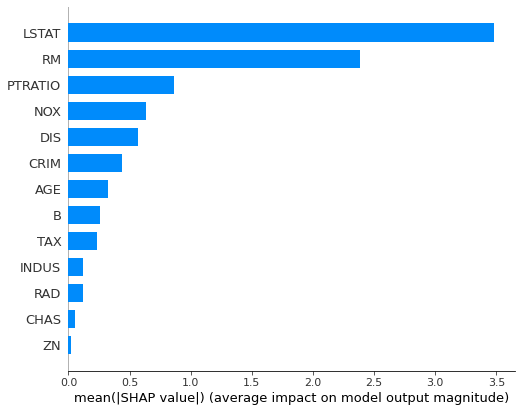

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

22.79454

In [ ]:
y_test.iloc[10].values, pred_xgb[10]

(array([21.5]), 20.37035)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_xgb[1]

(array([32.4]), 31.71124)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Dependence Plots

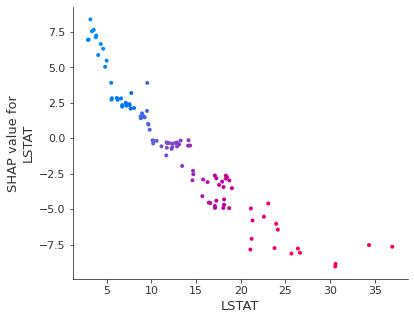

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

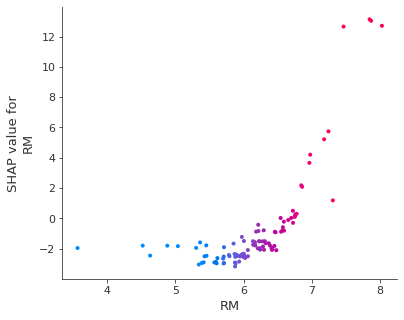

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

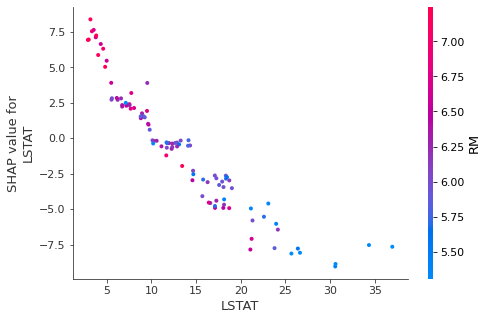

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='RM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

## Interpreting Classification Models

We will look at how to interpret a variety of classification models here:

- Logistic Regression
- XGBoost Classifier

## Dataset Preparation

Boston Houses Classification

- Price > \$ 30K is Class Label 1

- Price <= \$ 30K is Class Label 0

In [ ]:
y['Price'] = (y['Price'] > 30).astype(int)
y['Price'].head()

0    0
1    0
2    1
3    1
4    1
Name: Price, dtype: int64

In [ ]:
y['Price'].value_counts()

0    422
1     84
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Price'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Interpreting Logistic Regression Model


### Train and Evaluate Model Performance

In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear')
lor.fit(X_train, y_train)

pred_lor = lor.predict(X_test)

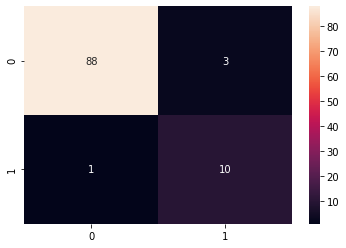

In [ ]:
cf = confusion_matrix(y_test, pred_lor)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.77      0.91      0.83        11

    accuracy                           0.96       102
   macro avg       0.88      0.94      0.91       102
weighted avg       0.97      0.96      0.96       102



### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(lor.predict, data=X_train)
shap_values = explainer.shap_values(X_test)

Using 404 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/102 [00:00<?, ?it/s]

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.010641 -0.053019  0.029188  ... -0.000906  0.008165 -0.106678
1 -0.013084  0.062667  0.089586  ...  0.064552  0.028607  0.462285
2 -0.002068 -0.011325 -0.043666  ... -0.024796  0.000229 -0.058505

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

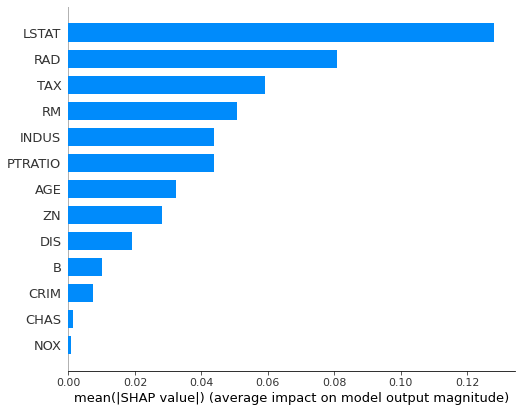

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

0.1782178217821782

In [ ]:
y_test.iloc[10], pred_lor[10]

(0, 0)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1], pred_lor[1]

(1, 1)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

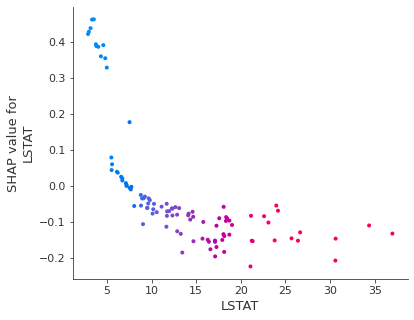

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

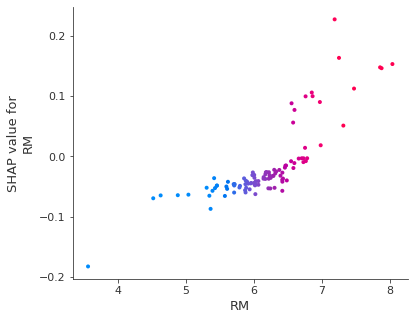

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

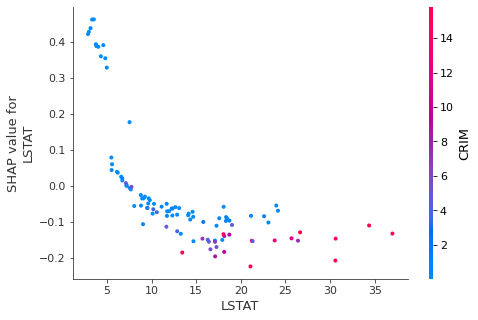

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

## Interpreting XGBoost Classifier Model


### Train and Evaluate Model Performance

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

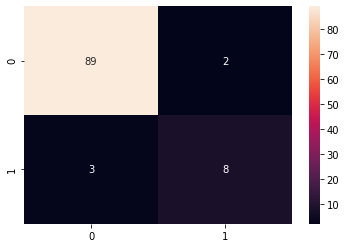

In [ ]:
cf = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
0  0.410493 -0.060440 -0.324672   0.0  ... -0.374684  0.426760  0.203956  0.539817
1 -0.657067  0.092154 -0.201271   0.0  ...  0.376124  0.552685  0.339106  2.350740
2  0.148121 -0.068638 -0.464081   0.0  ... -0.289846 -0.549669 -0.067194 -2.293152

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

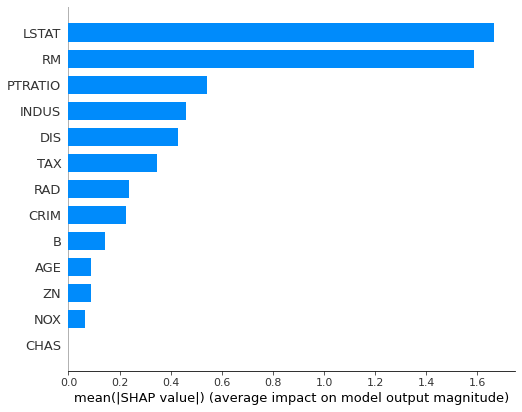

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

-2.3558486

In [ ]:
y_test.iloc[10], pred_xgb[10]

(0, 0)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1], pred_xgb[1]

(1, 1)

In [ ]:
shap.initjs() # remove shap.initjs() and set matplotlib=True in the below line if it doesn't render on colab
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

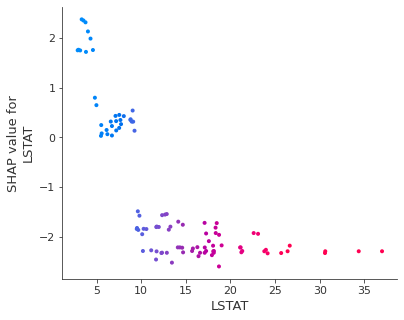

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

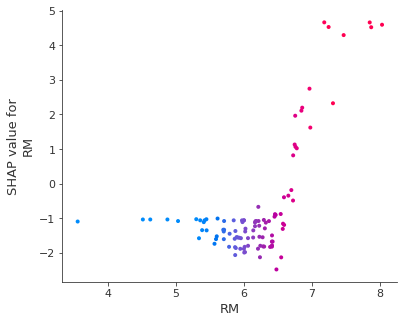

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)

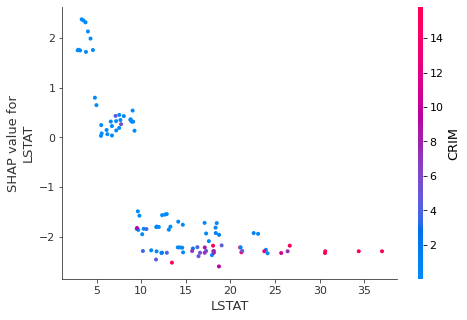

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values,
                     features=X_test,
                     display_features=X_test)